In [85]:
import pickle
import os
import copy
import numpy as np
import matplotlib

# Avoid type 3 fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


TASK_GOALS = [
  # (  z     x,    y)
    (0.5,  0.3, 0.15),
    (0.5, -0.3, 0.15),
    (0.5,  0.3,  0.3),
    (0.5, -0.3,  0.3),
    (0.7,  0.3, 0.15),
    (0.7, -0.3, 0.15),
    (0.7,  0.3,  0.3),
    (0.7, -0.3,  0.3),
]

GOAL_SEQUENCE = np.array([
    (0.6, 0.3, 0.15),
    (0.6, -0.3, 0.15),
    (0.6, 0., 0.3),
    (0.6, 0.3, 0.15),
])

file_name = "/home/eric/.deep-rl-docker/garage_embed/rollout_search_sequencer.pkl"

with open(file_name, "rb") as fin:
    samples = pickle.load(fin)


print('Loaded %i trajectories.' % len(samples))

Loaded 20 trajectories.


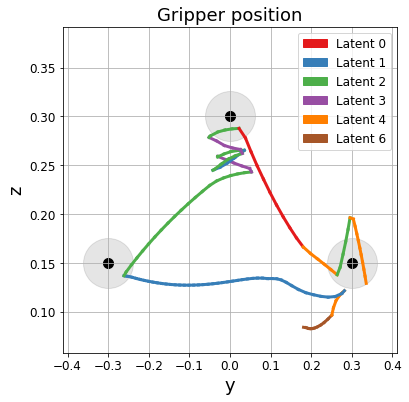

In [86]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import numpy as np

matplotlib.rcParams.update({'font.size': 12})
colormap = lambda x: matplotlib.cm.get_cmap("Set1")(x)

nrollouts = 1
ntasks = 8
fig = plt.figure(figsize=(6, 6))
plt.grid()

X_AXIS = 1
Y_AXIS = 2
axes = ["x", "y", "z"]

legend_handles = []
for t in range(ntasks):
    if t not in samples[0]["latent_indices"]:
        continue
    legend_handles.append(mpatches.Patch(color=colormap(t * 1. / ntasks), label='Latent %i' % t))
plt.legend(handles=legend_handles)
plt.title("Gripper position", fontsize=18)
plt.xlabel(axes[X_AXIS], fontsize=18)
plt.ylabel(axes[Y_AXIS], fontsize=18)

plt.scatter(GOAL_SEQUENCE[:-1, X_AXIS], GOAL_SEQUENCE[:-1, Y_AXIS], s=2500, c="black", alpha=.1)
plt.scatter(GOAL_SEQUENCE[:-1, X_AXIS], GOAL_SEQUENCE[:-1, Y_AXIS], s=100, c="black")

for i in range(nrollouts):
    pos = np.array([s["gripper_position"] for s in samples[i]["infos"]])
    tasks = samples[i]["latent_indices"]
    
    xs, ys = pos[:,X_AXIS], pos[:,Y_AXIS]
    for u in range(1, len(pos)):
        a, b = u-1, u+1
        plt.plot(xs[a:b], ys[a:b], color=colormap(tasks[u] * 1. / ntasks), linewidth=3)
        
fig.savefig("compose_sequence.png")
fig.savefig("compose_triangle.pdf")